In [76]:
# Imports
import pandas as pd
import numpy as np
%matplotlib inline  

# Parkeren in Utrecht
Via een WOB-verzoek van Marc Fonteijn is de data van alle parkeermeters in Utrecht openbaar gemaakt. Dit is een poging van mij om de data te analyseren en om te kijken of we er iets van kunnen leren! :)

We starten met het laden van alle data:

In [77]:
df = pd.read_csv('totaal.csv')
df = df.set_index('id')
df['start'] = pd.to_datetime(df['start']) # Starttijden converteren naar datetimes
df['einde'] = pd.to_datetime(df['einde']) # Eindtijden converteren naar datetimes
df['duur'] = df['einde'] - df['start'] # Hoe lang parkeert iedereen?

Vervolgens kijken we of we het correct is ingeladen:

In [78]:
df.head()

,paal,start,einde,kosten,duur
id,,,,,
0,28115,2014-01-01 18:50:49,2014-01-02 11:05:37,3.57,16:14:48
1,28305,2014-01-01 18:52:01,2014-01-02 09:10:34,0.57,14:18:33
2,28222,2014-01-01 18:56:45,2014-01-02 09:05:00,0.29,14:08:15
3,28102,2014-01-01 19:03:29,2014-01-02 09:05:42,0.29,14:02:13
4,12208,2014-01-01 19:05:35,2014-01-02 07:00:30,2.21,11:54:55


## Starttijden
Op welke tijden van de dag starten mensen met betaald parkeren? Met een distributie kan je dat onderzoeken:

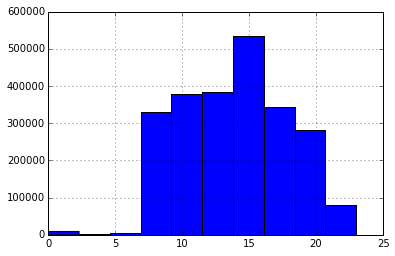

In [79]:
start = df['start']
hours = start.map(lambda x: x.hour)
hours.hist()

## Eindtijden
Hetzelfde geld voor eindtijden... 

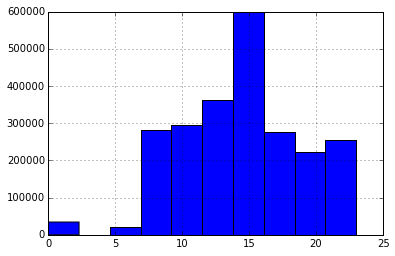

In [80]:
einde = df['einde']
hours = einde.map(lambda x: x.hour)
hours.hist()

## Duur
Hoe lang parkeren mensen dan eigen? Wat kunnen we daar van leren?

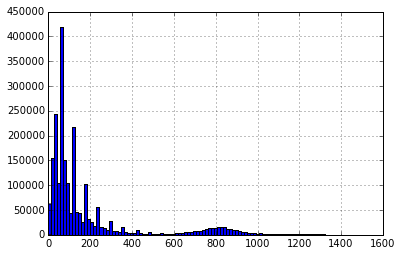

In [94]:
duur = df['duur']
hours = duur.map(lambda x: x / np.timedelta64(1, 'm'))
hours = hours[hours > 0] # Filter negatives
hours = hours[hours < 1440] # Filter longer then a day.
hours.hist(bins=100)

Interessant! Van de distributie kan je al een hoop leren, zo zie je dat iedereen bijna altijd tegen een uur aan parkeert... Dat zijn de pieken die er bovenuit steken... En de bult op ongeveer 850 minuten, dat is dus vaak een gedurende de nacht... en de volgende ochtend weer vertrekken..

# Analyse van de kosten
Ook de kosten van het parkeren zitten in het CSV bestand, eens kijken wat we daar van kunnen leren... Hoeveel betalen mensen ongeveer, en hoe is de distributie hier van?

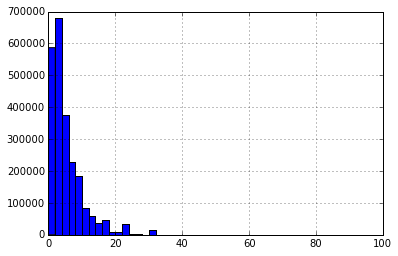

In [95]:
kosten = df['kosten']
kosten.hist(bins=50)